In [2]:
# -*- coding: utf-8 -*-

import os
import sys
from pprint import pprint

# root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(root + '/python')

import ccxt  # noqa: E402



In [4]:
#Exchanges

print('CCXT Version:', ccxt.__version__)

for exchange_id in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, exchange_id)()
        print(exchange_id)
        # do what you want with this exchange
        # pprint(dir(exchange))
    except Exception as e:
        print(e)

CCXT Version: 4.0.90
ace
alpaca
ascendex
bequant
bigone
binance
binancecoinm
binanceus
binanceusdm
bingx
bit2c
bitbank
bitbay
bitbns
bitcoincom
bitfinex
bitfinex2
bitflyer
bitforex
bitget
bithumb
bitmart
bitmex
bitopro
bitpanda
bitrue
bitso
bitstamp
bitstamp1
bittrex
bitvavo
bkex
bl3p
blockchaincom
btcalpha
btcbox
btcmarkets
btctradeua
btcturk
bybit
cex
coinbase
coinbaseprime
coinbasepro
coincheck
coinex
coinfalcon
coinmate
coinone
coinsph
coinspot
cryptocom
currencycom
delta
deribit
digifinex
exmo
fmfwio
gate
gateio
gemini
hitbtc
hitbtc3
hollaex
huobi
huobijp
huobipro
idex
independentreserve
indodax
kraken
krakenfutures
kucoin
kucoinfutures
kuna
latoken
lbank
lbank2
luno
lykke
mercado
mexc
mexc3
ndax
novadax
oceanex
okcoin
okex
okex5
okx
paymium
phemex
poloniex
poloniexfutures
probit
tidex
timex
tokocrypto
upbit
wavesexchange
wazirx
whitebit
woo
yobit
zaif
zonda


In [7]:
import ccxt
import pandas
import datetime
import time

ex = ccxt.kucoin()

def ohlcv_info():
    x = ex.fetch_ohlcv('BTC/USDT', '15m', limit=20)
    df = pandas.DataFrame(x, columns=['TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'])
    df['TIME'] = pandas.to_datetime(df['TIME'], unit='ms')
    print(f'*** {datetime.datetime.now()} ***\n {df.tail(1)}\n')
    time.sleep(5)

for i in range(5):
    ohlcv_info()


*** 2023-09-17 14:34:38.319101 ***
                   TIME     OPEN     HIGH      LOW    CLOSE   VOLUME
19 2023-09-17 17:30:00  26515.2  26515.2  26514.7  26514.8  0.80472



KeyboardInterrupt: 

In [8]:
exchange = ccxt.binance()
print(exchange.has)
exchange.fetch_ohlcv('BTC/USDT', '15m', limit=20)

{'publicAPI': True, 'privateAPI': True, 'CORS': None, 'spot': True, 'margin': True, 'swap': True, 'future': True, 'option': True, 'addMargin': True, 'cancelAllOrders': True, 'cancelOrder': True, 'cancelOrders': None, 'createDepositAddress': False, 'createLimitOrder': True, 'createMarketOrder': True, 'createOrder': True, 'createPostOnlyOrder': True, 'createReduceOnlyOrder': True, 'createStopOrder': True, 'createStopLimitOrder': True, 'createStopMarketOrder': False, 'editOrder': True, 'fetchAccounts': None, 'fetchBalance': True, 'fetchBidsAsks': True, 'fetchBorrowInterest': True, 'fetchBorrowRate': True, 'fetchBorrowRateHistory': True, 'fetchBorrowRatesPerSymbol': False, 'fetchBorrowRates': False, 'fetchCanceledOrders': 'emulated', 'fetchClosedOrder': False, 'fetchClosedOrders': 'emulated', 'fetchCurrencies': True, 'fetchDeposit': False, 'fetchDepositAddress': True, 'fetchDepositAddresses': False, 'fetchDepositAddressesByNetwork': False, 'fetchDeposits': True, 'fetchFundingFee': None, 'f

[[1694493000000, 25870.0, 25899.0, 25814.8, 25819.99, 545.03139],
 [1694493900000, 25819.99, 25828.85, 25742.82, 25760.81, 735.51141],
 [1694494800000, 25760.8, 25763.49, 25631.96, 25687.58, 956.78314],
 [1694495700000, 25687.59, 25687.59, 25612.7, 25645.58, 513.10044],
 [1694496600000, 25645.59, 25750.2, 25630.0, 25706.26, 582.76974],
 [1694497500000, 25706.27, 25782.1, 25705.49, 25773.08, 417.67549],
 [1694498400000, 25773.07, 25850.53, 25737.05, 25769.12, 708.65724],
 [1694499300000, 25769.11, 25806.1, 25729.21, 25787.48, 607.59687],
 [1694500200000, 25787.47, 25799.47, 25723.27, 25751.23, 578.4018],
 [1694501100000, 25751.22, 25776.99, 25735.0, 25763.73, 460.06301],
 [1694502000000, 25763.74, 25817.37, 25730.86, 25736.42, 482.88549],
 [1694502900000, 25736.42, 25763.88, 25724.63, 25749.76, 413.32217],
 [1694503800000, 25749.76, 25818.17, 25749.76, 25811.69, 471.36509],
 [1694504700000, 25811.69, 25874.99, 25799.99, 25822.71, 662.95273],
 [1694505600000, 25822.71, 25839.26, 25789.36

In [6]:
import ccxt
import calendar
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

exchange = ccxt.binance()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv

def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(exchange.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df

dt = ['20180101', '20200101']
df = ohlcv(dt, 'ETH/BTC', '1d')

In [22]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2017-12-31 22:00:00,0.053586,0.057200,0.053401,0.056367,312440.757
2018-01-01 22:00:00,0.056368,0.066265,0.051040,0.058261,492006.759
2018-01-02 22:00:00,0.058300,0.064210,0.056449,0.062600,469486.617
2018-01-03 22:00:00,0.062600,0.070000,0.060125,0.062236,595991.613
2018-01-04 22:00:00,0.062449,0.069758,0.054000,0.056584,710527.221
...,...,...,...,...,...
2020-12-25 21:00:00,0.025364,0.025506,0.023888,0.024055,316895.770
2020-12-26 21:00:00,0.024055,0.026500,0.022754,0.026057,732496.121
2020-12-27 21:00:00,0.026059,0.027666,0.025760,0.026967,612564.014


In [9]:
# consecutive days for ohlcv function
from datetime import datetime, date, timedelta

start_day = "20190101"
start_dt = datetime.strptime(start_day, "%Y%m%d")
end_day = "20190831"
end_dt = datetime.strptime(end_day, "%Y%m%d")
days_num = (end_dt - start_dt).days + 1
datelist = [start_dt + timedelta(days=x) for x in range(days_num)]
datelist = [date.strftime("%Y%m%d") for date in datelist]

df = ohlcv(datelist, 'BTC/USDT', '1d')

# hourly ETH/BTC ohlcv data between Jan 2019 and Aug 2020 from crypto exchange
#df.to_csv('data/eth_btc_1hour_2018JanTo2020Aug.csv')

KeyboardInterrupt: 

In [10]:
len(df.index.unique())

730

<AxesSubplot:xlabel='Time'>

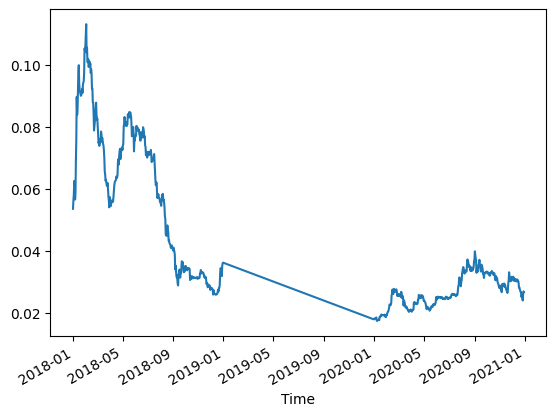

In [11]:
df["Open"].plot()

In [32]:
import ccxt
import calendar
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta


exchange = ccxt.mercado()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = exchange.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv

def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(exchange.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df

dt = ['20160101', '20230101']
df = ohlcv(dt, 'BTC/BRL', '1d')

In [13]:
start_dt = datetime.strptime('2010101', "%Y%m%d")
print(start_dt)
since = calendar.timegm(start_dt.utctimetuple())*1000
print(since)

2010-10-01 00:00:00
1285891200000


ace does not have market symbol BTC/USD
alpaca : 1162, 2020-04-08 02:00:00, 2023-07-13 02:00:00
index 0 is out of bounds for axis 0 with size 0
bequant {"timestamp":"2023-09-17T18:26:48.587Z","error":{"description":"Validation error. Please, check request parameters and try again.","code":10001,"message":"Bad request parameter [limit]. Parameter must be in [1, 1000]"},"path":"/api/3/public/candles?symbols=BTCUSD&period=D1&from=2009-01-01T00%3A00%3A00.000Z&limit=6000","requestId":"8b8d3822-2564763"}
bigone does not have market symbol BTC/USD
binance {"code":-4088,"msg":"Maximum time interval is 200 days."}
binancecoinm {"code":-4088,"msg":"Maximum time interval is 200 days."}
binanceus : 1000, 2019-09-16 21:00:00, 2022-06-11 21:00:00
binanceusdm does not have market symbol BTC/USD
bingx does not have market symbol BTC/USD
bit2c fetchOHLCV() is not supported yet. If you want to build OHLCV candles from trade executions data, visit https://github.com/ccxt/ccxt/tree/master/examples/ and se
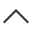

In [72]:
start_dt = datetime.strptime('20090101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

for ex in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, ex)()
        lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=6000)
        # do what you want with this exchange
        # pprint(dir(exchange))

        df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
        
    except Exception as e:
        print(e)

In [92]:
exchange = ccxt.mercado()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/BRL", timeframe="1d", since=since, limit=10000)

In [93]:
lista_ohlcv

[[1370995200000, 249.0, 275.0, 249.0, 262.0, 9.4837577],
 [1371081600000, 262.0, 269.0, 260.0, 269.0, 10.0579309],
 [1371168000000, 259.0, 269.0, 245.0, 251.96, 30.2142912],
 [1371254400000, 262.99, 262.99, 250.0, 259.99, 22.78030792],
 [1371340800000, 257.5, 257.5, 246.01, 257.43, 1.98586865],
 [1371427200000, 256.0, 257.43, 252.0, 252.0, 13.4528091],
 [1371513600000, 254.96, 263.0, 246.11, 263.0, 30.18151264],
 [1371600000000, 251.01, 264.98, 251.01, 259.99999, 4.25423041],
 [1371686400000, 260.0, 269.0, 260.0, 269.0, 26.66058463],
 [1371772800000, 269.0, 269.0, 250.22, 268.0, 15.10299454],
 [1371859200000, 250.23, 268.0, 250.22, 267.25, 8.67732878],
 [1371945600000, 267.249, 267.25, 251.02, 251.02, 1.3947048],
 [1372032000000, 251.02, 259.49, 250.0101, 258.99, 20.11927034],
 [1372118400000, 255.0, 268.89, 250.03, 268.49, 43.05989256],
 [1372204800000, 268.39999, 268.4, 252.5, 264.84, 23.71515684],
 [1372291200000, 262.38, 262.38, 253.021, 257.99, 38.68624178],
 [1372377600000, 258.0

In [51]:
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
df

,Open,High,Low,Close,Volume
Time,,,,,
2021-09-13 21:00:00,44983.77,47273.38,44704.18,47103.18,1643.956624
2021-09-14 21:00:00,47123.81,48465.77,46702.26,48150.94,1307.248711
2021-09-15 21:00:00,48188.12,48505.00,47035.00,47760.64,1886.041734
2021-09-16 21:00:00,47773.44,48179.00,46712.14,47305.18,1558.523176
2021-09-17 21:00:00,47316.21,48834.00,47052.90,48326.74,1452.506231
...,...,...,...,...,...
2023-09-12 21:00:00,25842.00,26395.00,25762.00,26226.00,1566.277456
2023-09-13 21:00:00,26229.00,26849.00,26143.00,26529.00,2087.026026
2023-09-14 21:00:00,26529.00,26878.00,26228.00,26607.00,1388.809004


In [36]:
print(exchange.fetch_ohlcv.__doc__)


        fetches historical candlestick data containing the open, high, low, and close price, and the volume of a market
        :param str symbol: unified symbol of the market to fetch OHLCV data for
        :param str timeframe: the length of time each candle represents
        :param int [since]: timestamp in ms of the earliest candle to fetch
        :param int [limit]: the maximum amount of candles to fetch
        :param dict [params]: extra parameters specific to the mercado api endpoint
        :returns int[][]: A list of candles ordered, open, high, low, close, volume
        


In [33]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2016-01-01 22:00:00,1795.000000,1817.000000,1768.993120,1783.000000,20.940067
2016-01-02 22:00:00,1783.000000,1800.000000,1766.000000,1775.000000,36.649822
2016-01-03 22:00:00,1780.000000,1830.000000,1771.644040,1824.979520,127.016090
2016-01-04 22:00:00,1802.572010,1825.000000,1781.214530,1825.000000,86.233882
2016-01-05 22:00:00,1825.000000,1829.999990,1802.002110,1820.000000,46.098096
...,...,...,...,...,...
2023-09-07 21:00:00,131109.508121,131963.390000,128517.040000,129728.912374,24.228281
2023-09-08 21:00:00,129752.029723,130227.946315,129147.696376,130056.262204,6.654019
2023-09-09 21:00:00,130000.000000,130284.000000,128647.000000,129502.593561,10.460571


<AxesSubplot:xlabel='Time'>

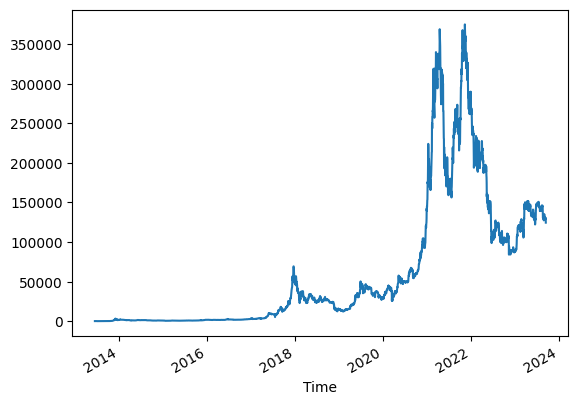

In [62]:
df["Open"].plot()

In [69]:
#bitstamp one of the osdest exchanges
start_dt = datetime.strptime('20111001', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000
exchange = ccxt.bitstamp()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=3000)
len(lista_ohlcv)

1000

In [70]:
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
df

,Open,High,Low,Close,Volume
Time,,,,,
2017-03-23 21:00:00,1030.84,1032.00,920.00,929.06,16072.417083
2017-03-24 21:00:00,928.10,963.36,891.33,956.02,13507.435421
2017-03-25 21:00:00,956.02,997.00,937.52,960.00,9012.917651
2017-03-26 21:00:00,959.08,1043.00,952.95,1039.92,8687.087115
2017-03-27 21:00:00,1039.09,1068.26,1014.90,1043.99,9115.517125
...,...,...,...,...,...
2019-12-13 21:00:00,7255.94,7269.00,7007.48,7059.03,2012.348906
2019-12-14 21:00:00,7066.35,7225.23,7007.00,7115.08,1848.345728
2019-12-15 21:00:00,7115.08,7147.91,6820.00,6882.19,5923.055479
